In [ ]:
pip install keras

In [ ]:
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D, MaxPooling2D,Dropout,Activation,Reshape
from keras.layers.experimental import preprocessing
from keras.models import Model
from keras import regularizers, optimizers
from keras.applications.vgg16 import VGG16
from keras.models import Sequential
from keras.preprocessing import image,image_dataset_from_directory
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib
import PIL
import cv2
from sklearn.preprocessing import MultiLabelBinarizer
import tqdm
import seaborn as sns

In [ ]:
label=pd.read_csv('/content/drive/MyDrive/GA Work/Image_label_demo.csv',index_col=0)
label.head()

,Image_name,description,score,topicality
0,000ac7f648.jpg,Clothing,0.992143,0.992143
1,000ac7f648.jpg,Sleeve,0.971029,0.971029
2,000ac7f648.jpg,Shoulder,0.965546,0.965546
3,0187c40f0a.jpg,Sleeve,0.971030,0.971030
4,0187c40f0a.jpg,Pattern,0.968143,0.968143


In [ ]:
label.description.nunique()

30

In [ ]:
label_with97score=label[label.score>0.97]
label_with97score['description'].nunique()

19

In [ ]:
label_with97score['description'].unique()

array(['Clothing', 'Sleeve', 'Green', 'Dress', 'Product', 'Brown', 'Blue',
       'Leg', 'Human leg', 'Finger', 'Yellow', 'Pattern', 'Hairstyle',
       'Window', 'Hat', 'Footwear', 'Skin', 'Dress shirt', 'Collar'],
      dtype=object)

192        Dress
193    Human leg
194     Shoulder
Name: description, dtype: object

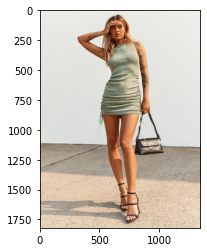

In [ ]:
image1=image.load_img('/content/drive/MyDrive/Image_test/a9e0a0066d.jpg')
plt.imshow(image1)
label[label['Image_name']=='a9e0a0066d.jpg'].description

In [ ]:
discard_label=['Product','Leg','Human leg','Finger','Hairstyle','Window','Skin']

final_label=label_with97score[~label_with97score.description.isin(discard_label)].reset_index(drop=True)
final_label.head()

,Image_name,description,score,topicality
0,000ac7f648.jpg,Clothing,0.992143,0.992143
1,000ac7f648.jpg,Sleeve,0.971029,0.971029
2,0187c40f0a.jpg,Sleeve,0.971030,0.971030
3,02d88b364f.jpg,Clothing,0.992518,0.992518
4,02d88b364f.jpg,Green,0.977933,0.977933


In [ ]:
multi_label=pd.DataFrame(columns=['Image_name','description'])
for i in final_label.Image_name:
  multi_label=multi_label.append({'Image_name':i,
                  'description':list(final_label[final_label.Image_name==i]['description'])},ignore_index=True)

In [ ]:
multi_label.drop_duplicates(subset='Image_name',inplace=True)

In [ ]:
multi_label.reset_index(drop=True,inplace=True)
multi_label

,Image_name,description
0,000ac7f648.jpg,"[Clothing, Sleeve]"
1,0187c40f0a.jpg,[Sleeve]
2,02d88b364f.jpg,"[Clothing, Green, Sleeve]"
3,099e0d557f.jpg,"[Clothing, Dress, Sleeve]"
4,0c91e46c7f.jpg,"[Clothing, Dress, Sleeve]"
...,...,...
81,f8b87c59ea.jpg,"[Sleeve, Pattern]"
82,fbd0fec2ff.jpg,"[Blue, Yellow, Sleeve]"
83,image1.jpg,"[Blue, Dress shirt, Collar]"
84,image2.jpg,"[Clothing, Sleeve]"


In [ ]:
print(final_label['description'].unique())
print(final_label['description'].nunique())

['Clothing' 'Sleeve' 'Green' 'Dress' 'Brown' 'Blue' 'Yellow' 'Pattern'
 'Hat' 'Footwear' 'Dress shirt' 'Collar']
12


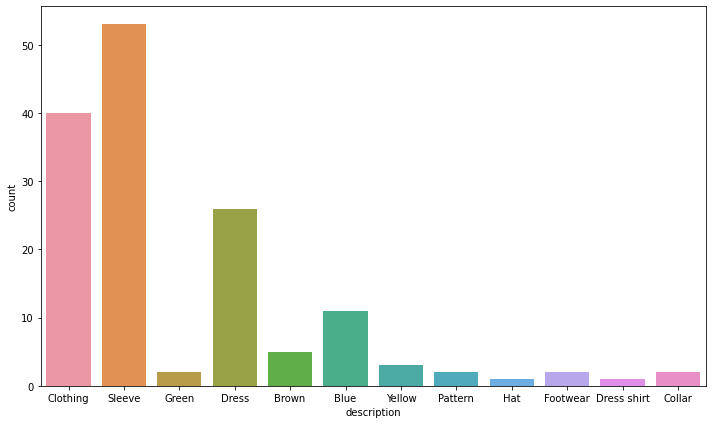

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='description',data=final_label)
plt.tight_layout()

In [ ]:
mlb=MultiLabelBinarizer()
labels=mlb.fit_transform(multi_label['description'])
labels

array([[0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
print(mlb.classes_)

print(labels.shape)

['Blue' 'Brown' 'Clothing' 'Collar' 'Dress' 'Dress shirt' 'Footwear'
 'Green' 'Hat' 'Pattern' 'Sleeve' 'Yellow']
(86, 12)


In [ ]:
drive_path=pathlib.Path('/content/drive/MyDrive/Image_test')
drive_path

PosixPath('/content/drive/MyDrive/Image_test')

In [ ]:
len(list(drive_path.glob('**/*.jpg')))

98

In [ ]:
str(drive_path)

'/content/drive/MyDrive/Image_test'

In [ ]:
len(multi_label)

86

In [ ]:
x=[]
path='/content/drive/MyDrive/Image_test/'

for img in tqdm.tqdm((multi_label.Image_name)):
  #read image as tensor array
  Img=cv2.imread(path+str(img))
  #resize
  resize=cv2.resize(Img,(256,256))
  x.append(resize)

100%|██████████| 86/86 [00:01<00:00, 68.04it/s]


In [ ]:
# image shape
x=np.array(x)
x.shape

(86, 256, 256, 3)

In [ ]:
#scale
scale_x=x/255
scale_x[0]

array([[[0.90980392, 0.90980392, 0.90980392],
        [0.90196078, 0.90196078, 0.90196078],
        [0.90196078, 0.90196078, 0.90196078],
        ...,
        [0.91764706, 0.91764706, 0.91764706],
        [0.90980392, 0.90980392, 0.90980392],
        [0.91372549, 0.91372549, 0.91372549]],

       [[0.90588235, 0.90588235, 0.90588235],
        [0.90980392, 0.90980392, 0.90980392],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ]],

       [[0.89803922, 0.89803922, 0.89803922],
        [0.89019608, 0.89019608, 0.89019608],
        [0.89411765, 0.89411765, 0.89411765],
        ...,
        [0.93333333, 0.93333333, 0.93333333],
        [0.93333333, 0.93333333, 0.93333333],
        [0.92941176, 0.92941176, 0.92941176]],

       ...,

       [[0.85490196, 0.88627451, 0.88235294],
        [0.86666667, 0.88235294, 0.88235294],
        [0.8745098 , 0

In [ ]:
len(scale_x)

86

In [ ]:
#data_augmentation=image.ImageDataGenerator(width_shift_range= 0.2, height_shift_range= 0.2,
                  #rotation_range= 90,
                  #horizontal_flip= True, vertical_flip=True)

In [ ]:
data_aug=Sequential([preprocessing.RandomFlip('horizontal_and_vertical'),
           preprocessing.RandomRotation(0.2),
           preprocessing.RandomZoom(0.2)
           ])

In [ ]:
datagen=image.ImageDataGenerator(rescale = 1./255,width_shift_range= 0.2, height_shift_range= 0.2,
                                 rotation_range= 90,
                                horizontal_flip= True, vertical_flip=True)
train_image_gen=datagen.flow_from_dataframe(dataframe=multi_label,directory='/content/drive/MyDrive/GA Work/dress',
                            x_col='Image_name',y_col='description',
                            class_mode='categorical',target_size=(256,256),
                            classes=list(train_image_gen.class_indices.keys()))
#test_image_gen=datagen.flow_from_dataframe(dataframe=multi_label[95:],directory='/content/drive/MyDrive/GA Work/dress',
                            #x_col='Image_name',y_col='description',
                            #class_mode='categorical',target_size=(256,256))


Found 86 validated image filenames belonging to 12 classes.


In [ ]:
model_IDG=Sequential([
          #1
          Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)),
          MaxPooling2D(pool_size=(2,2)),

          Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          #2
          Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          #3
          Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          #4
          Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          Dropout(0.2),

          #pass into ANN
          Flatten(),
          Dense(128,activation='relu'),
          #softmax is use for multiclass classification, but for multilabel we will use sigmoid
          Dense(12,activation='sigmoid')
])

#model.add(Reshape((-1,)))
model_IDG.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model=Sequential([data_aug,
          #1
          Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu',input_shape=(256,256,3)),
          MaxPooling2D(pool_size=(2,2)),

          Conv2D(filters=16,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          #2
          Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          #3
          Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          #4
          Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu'),
          MaxPooling2D(pool_size=(2,2)),
          Dropout(0.2),

          #pass into ANN
          Flatten(),
          Dense(128,activation='relu'),
          #softmax is use for multiclass classification, but for multilabel we will use sigmoid
          Dense(12,activation='sigmoid')
])

#model.add(Reshape((-1,)))
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 16)      2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

In [ ]:
model.output_shape

(None, 12)

In [ ]:
step_size=train_image_gen.n//train_image_gen.batch_size

In [ ]:
model.fit(scale_x,labels,epochs=100,steps_per_epoch=step_size)

Epoch 1/100
2/2 [==============================] - 7s 3s/step - loss: 0.6254 - accuracy: 0.1395
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 0.3462 - accuracy: 0.2248
Epoch 3/100
2/2 [==============================] - 4s 2s/step - loss: 0.3693 - accuracy: 0.3256
Epoch 4/100
2/2 [==============================] - 4s 2s/step - loss: 0.3296 - accuracy: 0.1938
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 0.3032 - accuracy: 0.2016
Epoch 6/100
2/2 [==============================] - 4s 2s/step - loss: 0.2784 - accuracy: 0.2016
Epoch 7/100
2/2 [==============================] - 5s 2s/step - loss: 0.2866 - accuracy: 0.1938
Epoch 8/100
2/2 [==============================] - 4s 2s/step - loss: 0.2879 - accuracy: 0.2016
Epoch 9/100
2/2 [==============================] - 4s 2s/step - loss: 0.2896 - accuracy: 0.1783
Epoch 10/100
2/2 [==============================] - 5s 2s/step - loss: 0.2831 - accuracy: 0.2016
Epoch 11/100
2/2 [=====================

In [ ]:
model_IDG.fit(train_image_gen,epochs=100,steps_per_epoch=step_size)

Epoch 1/100
2/2 [==============================] - 6s 2s/step - loss: 0.6481 - accuracy: 0.1667
Epoch 2/100
2/2 [==============================] - 5s 2s/step - loss: 0.3783 - accuracy: 0.2239
Epoch 3/100
2/2 [==============================] - 4s 1s/step - loss: 0.3338 - accuracy: 0.2419
Epoch 4/100
2/2 [==============================] - 5s 2s/step - loss: 0.3194 - accuracy: 0.4271
Epoch 5/100
2/2 [==============================] - 4s 2s/step - loss: 0.2483 - accuracy: 0.2211
Epoch 6/100
2/2 [==============================] - 5s 2s/step - loss: 0.2882 - accuracy: 0.1979
Epoch 7/100
2/2 [==============================] - 5s 2s/step - loss: 0.2914 - accuracy: 0.2083
Epoch 8/100
2/2 [==============================] - 5s 2s/step - loss: 0.2852 - accuracy: 0.1860
Epoch 9/100
2/2 [==============================] - 4s 2s/step - loss: 0.2803 - accuracy: 0.2334
Epoch 10/100
2/2 [==============================] - 5s 2s/step - loss: 0.2932 - accuracy: 0.1879
Epoch 11/100
2/2 [=====================